In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import mason_functions as mf

from sklearn.model_selection import TimeSeriesSplit

import acquire
import prepare

# plotting defaults
plt.rc('figure', figsize = (13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size = 16)

# Exploration Exercises

In [2]:
sf = prepare.prep_tssf()
sf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_amount    913000 non-null  float64
 1   sale_id        913000 non-null  int64  
 2   item_brand     913000 non-null  object 
 3   item_id        913000 non-null  int64  
 4   item_name      913000 non-null  object 
 5   item_price     913000 non-null  float64
 6   item_upc12     913000 non-null  int64  
 7   item_upc14     913000 non-null  int64  
 8   store_address  913000 non-null  object 
 9   store_city     913000 non-null  object 
 10  store_id       913000 non-null  int64  
 11  store_state    913000 non-null  object 
 12  store_zipcode  913000 non-null  int64  
 13  month          913000 non-null  int64  
 14  day_of_week    913000 non-null  int64  
 15  stringday      913000 non-null  object 
 16  sales_total    913000 non-nu

In [3]:
sf.head()

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,stringday,sales_total
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,26.0,295813,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,1,Tuesday,30.16
2013-01-01 00:00:00+00:00,32.0,125995,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,1,1,Tuesday,308.48
2013-01-01 00:00:00+00:00,45.0,314073,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,1,Tuesday,197.55
2013-01-01 00:00:00+00:00,34.0,332333,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,1,Tuesday,25.16


In [7]:
#group by store and then item, look at sale dates
first_sale = sf.reset_index().groupby(['store_id', 'item_id']).sale_date.min()
first_sale.head(51)

store_id  item_id
1         1         2013-01-01 00:00:00+00:00
          2         2013-01-01 00:00:00+00:00
          3         2013-01-01 00:00:00+00:00
          4         2013-01-01 00:00:00+00:00
          5         2013-01-01 00:00:00+00:00
          6         2013-01-01 00:00:00+00:00
          7         2013-01-01 00:00:00+00:00
          8         2013-01-01 00:00:00+00:00
          9         2013-01-01 00:00:00+00:00
          10        2013-01-01 00:00:00+00:00
          11        2013-01-01 00:00:00+00:00
          12        2013-01-01 00:00:00+00:00
          13        2013-01-01 00:00:00+00:00
          14        2013-01-01 00:00:00+00:00
          15        2013-01-01 00:00:00+00:00
          16        2013-01-01 00:00:00+00:00
          17        2013-01-01 00:00:00+00:00
          18        2013-01-01 00:00:00+00:00
          19        2013-01-01 00:00:00+00:00
          20        2013-01-01 00:00:00+00:00
          21        2013-01-01 00:00:00+00:00
          22    

In [8]:
#group by datetime and look at sum of sales
by_date = sf.groupby('sale_date').sale_amount.sum().reset_index()
by_date.head()

,sale_date,sale_amount
0,2013-01-01 00:00:00+00:00,13696.0
1,2013-01-02 00:00:00+00:00,13678.0
2,2013-01-03 00:00:00+00:00,14488.0
3,2013-01-04 00:00:00+00:00,15677.0
4,2013-01-05 00:00:00+00:00,16237.0


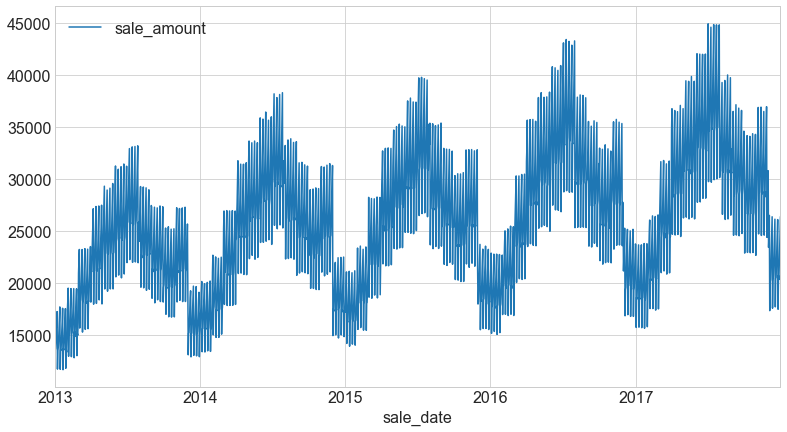

In [9]:
#plot sum of sales by day
by_date.plot(x = 'sale_date', y = 'sale_amount');

In [10]:
n_splits = 5
tss = TimeSeriesSplit(n_splits)

In [12]:
for train_index, test_index in tss.split(sf):
    print(f'Train: {train_index} | Test: {test_index}')
    print(f'Train Length: {len(train_index)} | Test Length: {len(test_index)}')

Train: [     0      1      2 ... 152167 152168 152169] | Test: [152170 152171 152172 ... 304333 304334 304335]
Train Length: 152170 | Test Length: 152166
Train: [     0      1      2 ... 304333 304334 304335] | Test: [304336 304337 304338 ... 456499 456500 456501]
Train Length: 304336 | Test Length: 152166
Train: [     0      1      2 ... 456499 456500 456501] | Test: [456502 456503 456504 ... 608665 608666 608667]
Train Length: 456502 | Test Length: 152166
Train: [     0      1      2 ... 608665 608666 608667] | Test: [608668 608669 608670 ... 760831 760832 760833]
Train Length: 608668 | Test Length: 152166
Train: [     0      1      2 ... 760831 760832 760833] | Test: [760834 760835 760836 ... 912997 912998 912999]
Train Length: 760834 | Test Length: 152166


In [22]:
train_index[-1]

760833

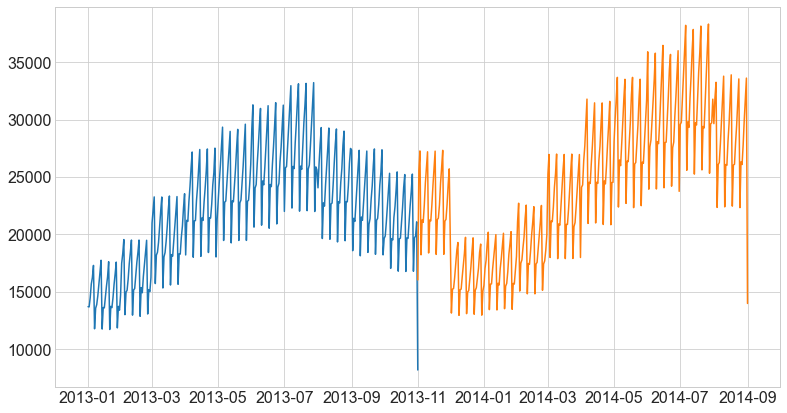

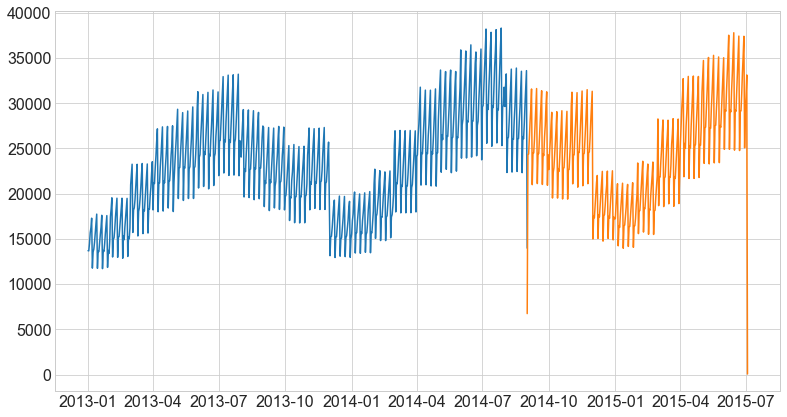

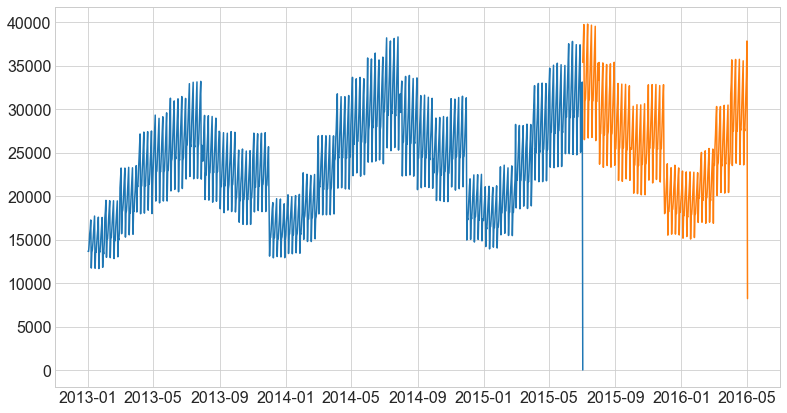

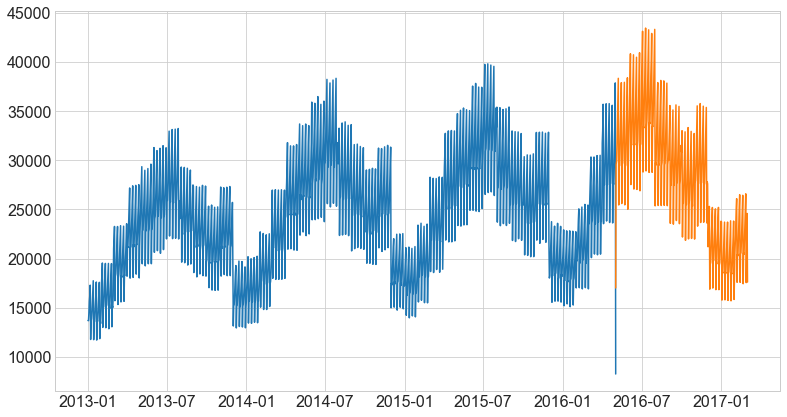

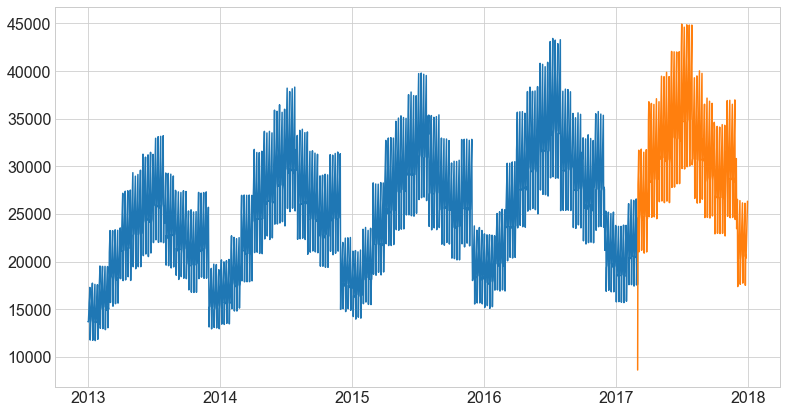

In [24]:
for train_index, test_index in tss.split(sf):
    train = sf[: train_index[-1]]
    test = sf[test_index[0]: test_index[-1]]

    train_by_date = train.groupby('sale_date').sale_amount.sum().reset_index()
    test_by_date = test.groupby('sale_date').sale_amount.sum().reset_index()
    
    plt.plot(train_by_date.sale_date, train_by_date.sale_amount)
    plt.plot(test_by_date.sale_date, test_by_date.sale_amount)
    
    plt.show();

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 760834 entries, 2013-01-01 00:00:00+00:00 to 2017-03-02 00:00:00+00:00
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_amount    760834 non-null  float64
 1   sale_id        760834 non-null  int64  
 2   item_brand     760834 non-null  object 
 3   item_id        760834 non-null  int64  
 4   item_name      760834 non-null  object 
 5   item_price     760834 non-null  float64
 6   item_upc12     760834 non-null  int64  
 7   item_upc14     760834 non-null  int64  
 8   store_address  760834 non-null  object 
 9   store_city     760834 non-null  object 
 10  store_id       760834 non-null  int64  
 11  store_state    760834 non-null  object 
 12  store_zipcode  760834 non-null  int64  
 13  month          760834 non-null  int64  
 14  day_of_week    760834 non-null  int64  
 15  stringday      760834 non-null  object 
 16  sales_total    760834 non-nu

In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 152166 entries, 2017-03-02 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_amount    152166 non-null  float64
 1   sale_id        152166 non-null  int64  
 2   item_brand     152166 non-null  object 
 3   item_id        152166 non-null  int64  
 4   item_name      152166 non-null  object 
 5   item_price     152166 non-null  float64
 6   item_upc12     152166 non-null  int64  
 7   item_upc14     152166 non-null  int64  
 8   store_address  152166 non-null  object 
 9   store_city     152166 non-null  object 
 10  store_id       152166 non-null  int64  
 11  store_state    152166 non-null  object 
 12  store_zipcode  152166 non-null  int64  
 13  month          152166 non-null  int64  
 14  day_of_week    152166 non-null  int64  
 15  stringday      152166 non-null  object 
 16  sales_total    152166 non-nu